### Image Recognition

So what does machine learning actually do? (Other than figuring out your shopping preferences and sending you directed advertising?) Machine learning is very useful in image recognition. We will do a very simple machine learning exercise that involves recognizing hand-written numeric digits. The code here is from [TensorFlow: MNIST For ML Beginners](https://www.tensorflow.org/get_started/mnist/beginners). This is considered the "Hello World" of machine learning.


### Getting some training data

We will need some training data to feed our machine learning system, just like how we trained a machine learning system with some data points when we did regressions. The code cell below downloads the standard MNIST machine learning training data sets. 

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### `y = W x + b` revisited

Here is where our classic linear equation does something very interesting. Let's pretend that instead of dealing with scalar values (singleton numbers) we are instead working with matrices. We want the input value `x` to be some type of image (which we flatten from 28 x 28 grayscale pixels into a 1 dimensional array of 784 floating point numbers). We want the output to be a list of probabilities, corresponding to each digit. For example, the output `y[0]` would tell us the probability of the input representing the number `0`. The output `y[6]` would tell us the probability of the input representing the number `6`. 

What about `W` and `b`, then? Well, we want `W` to be some type of weighting system. `W` is a matrix with 10 rows, each corresponding to a different digit. Each row has 784 values which represent the weight, or importance, of a pixel being a part of that digit. The `b` value is a "bias" that adjusts the probabilities at the end.

...And remember, we let the computer figure out what the `W` and `b` values are through training. We first setup our tensors...

In [5]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.matmul(x, W) + b


### It can't be that easy...

...well, our model isn't very complicated. We do need to add in a few more operations to get some usable data. `tf.nn.softmax` is a type of normalization to make everything scale the same way. We determine loss using a different type of model called "cross entropy". Then we add in a little code in our training loop to train in batches of 100 images. (There are 55,000 training images!)

But that's it. Watch how fast it runs.

In [6]:
# Normalize
sm = tf.nn.softmax(y)

# Cross entropy
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(sm), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
print "Trained!"

Trained!


### How do we know if it worked?

We can run an accuracy function on a separate set of 5,000 images, called the "test" set. This sees if our model generalizes well to data that the machine hasn't seen...

In [58]:
correct_prediction = tf.equal(tf.argmax(sm, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9162


### 92%!

... this actually isn't very good, but this is a very simple machine learning model. Let's try it out. You can write down a digit, take a picture of it and save the picture in this directory. Change the `inputfile` variable to the name of your image, run it, and see if it could detect the digit you wrote. It will output an array of probabilities and a graph of the data that it is analyzing (after transforming it to the correct numerical format.)

[[-0.78974885 -5.79418659  6.11572218  0.89799726 -3.08716321  0.3547672
  -2.80192208 -0.70590359  3.07818913  2.73225403]]


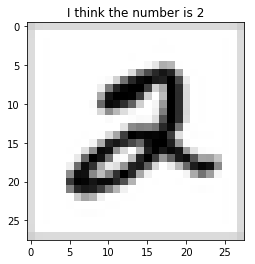

In [9]:

inputfile = "mnist-2.png"

from PIL import Image

img = Image.open(inputfile)
img = img.convert(mode="L")
img = img.resize((28, 28), Image.ANTIALIAS)
raster_data = list()
for col in range(28):
    for row in range(28):
        raster_data.append((255 - img.getpixel((row, col))) / 255.0)

xs = [ raster_data ]

import numpy as np

xs_array = np.asarray(raster_data).reshape(1, 784)

%matplotlib inline
import matplotlib.pyplot as plt

print sess.run(y, feed_dict={x: xs_array})

prediction = sess.run(y, feed_dict={x: xs_array}).argmax()
plt.title('I think the number is %d' % (prediction))
plt.imshow(xs_array.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
plt.show()
    


### Did it work?

... you may have trouble getting it to work. The reason is because the training set is actually very small and doesn't have a lot of variation. In addition, the model is simple and doesn't consider the 2D structure of an image, which is important if the digit isn't centered in the image, or if it isn't the same size or apsect ratio. (Your camera may have taken a 4:3 image, but this gets distorted into a square.)

### So what does this mean?

We will always need people to write clever code and algorithms to solve specific types of problems quickly. However, there are many problems that are more easily solved by machine learning. With the amount of data that we are generating every day, it means that machine learning is becoming a very popular method for tackling big questions and solving problems that may have never been solved with specialized algorithms. 